In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('gdrive/My Drive/projects/timeseries')
!ls

Mounted at /content/gdrive
'Alpha and Beta.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
 data
 data_plain
 sp500_close.csv
 ts_stck


## Explarotary Analysis of Stock data (time series)

In [ ]:
import pandas as pd

#DATA sources
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=INTC&outputsize=full&apikey=S7ZA74J04RY49JPY&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=TSLA&outputsize=full&apikey=S7ZA74J04RY49JPY&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=LON.IAG&outputsize=full&apikey=S7ZA74J04RY49JPY&datatype=csv



In [ ]:
os.listdir('./data')

['daily_adjusted_TSLA.csv',
 'daily_adjusted_INTC.csv',
 'daily_adjusted_AMD.csv',
 'daily_adjusted_AAPL.csv',
 'daily_adjusted_MSFT.csv',
 'daily_adjusted_SPY.csv',
 'daily_adjusted_GOOG.csv',
 'daily_adjusted_FB.csv',
 'daily_adjusted_IBM.csv',
 'all_stocks_5yr.csv']

In [ ]:
sym_list=[i.split('_')[2].split('.')[0] for i in os.listdir('./data') if i.split('_')[0]=='daily']
sym_list

['TSLA', 'INTC', 'AMD', 'AAPL', 'MSFT', 'SPY', 'GOOG', 'FB', 'IBM']

load data

In [ ]:
df_all=pd.DataFrame({})
if os.path.exists('./data/all_stocks_5yr.csv')==False:
  for i in os.listdir('./data'):
    sym=i.split('_')[2].split('.')[0]
    if i.split('_')[0]=='daily':
     
      df=pd.read_csv(''.join(["./data/", str(i)]),names=["date","open","high","low","close","adjusted_close","volume","dividend_amount","split_coefficient"],header=0)
      df['Name']=sym
      df_all=pd.concat([df_all,df],axis=0)
  df_all.to_csv('./data/'+'all_stocks_5yr.csv',index=False)
df_all.columns


Index([], dtype='object')

In [ ]:
sym_list

['TSLA', 'INTC', 'AMD', 'AAPL', 'MSFT', 'SPY', 'GOOG', 'FB', 'IBM']

In [ ]:
df_all.head()

""


In [ ]:
df = pd.read_csv('./data/all_stocks_5yr.csv')

In [ ]:
df.head()

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,Name
0,2020-11-25,550.06,574.0000,545.37,574.00,574.00,48930162,0.0,1.0,TSLA
1,2020-11-24,540.40,559.9900,526.20,555.38,555.38,52058771,0.0,1.0,TSLA
2,2020-11-23,503.50,526.0000,501.79,521.85,521.85,50260304,0.0,1.0,TSLA
3,2020-11-20,497.99,502.5000,489.06,489.61,489.61,32911922,0.0,1.0,TSLA
4,2020-11-19,492.00,508.6112,487.57,499.27,499.27,62475346,0.0,1.0,TSLA


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38268 entries, 0 to 38267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               38268 non-null  object 
 1   open               38268 non-null  float64
 2   high               38268 non-null  float64
 3   low                38268 non-null  float64
 4   close              38268 non-null  float64
 5   adjusted_close     38268 non-null  float64
 6   volume             38268 non-null  int64  
 7   dividend_amount    38268 non-null  float64
 8   split_coefficient  38268 non-null  float64
 9   Name               38268 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 2.9+ MB


In [ ]:
sum(df.isnull().sum(axis = 1))

0

In [ ]:
df['Name'].unique()

array(['TSLA', 'INTC', 'AMD', 'AAPL', 'MSFT', 'SPY', 'GOOG', 'FB', 'IBM'],
      dtype=object)

In [ ]:
df['Name'].unique().shape

(9,)

In [ ]:
df[df['Name'] == 'TSLA']

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,Name
0,2020-11-25,550.06,574.0000,545.37,574.00,574.000,48930162,0.0,1.0,TSLA
1,2020-11-24,540.40,559.9900,526.20,555.38,555.380,52058771,0.0,1.0,TSLA
2,2020-11-23,503.50,526.0000,501.79,521.85,521.850,50260304,0.0,1.0,TSLA
3,2020-11-20,497.99,502.5000,489.06,489.61,489.610,32911922,0.0,1.0,TSLA
4,2020-11-19,492.00,508.6112,487.57,499.27,499.270,62475346,0.0,1.0,TSLA
...,...,...,...,...,...,...,...,...,...,...
2618,2010-07-06,20.00,20.0000,15.83,16.11,3.222,6866900,0.0,1.0,TSLA
2619,2010-07-02,23.00,23.1000,18.71,19.20,3.840,5139800,0.0,1.0,TSLA
2620,2010-07-01,25.00,25.9200,20.27,21.96,4.392,8218800,0.0,1.0,TSLA
2621,2010-06-30,25.79,30.4192,23.30,23.83,4.766,17187100,0.0,1.0,TSLA


In [ ]:
ibm = df[df['Name'] == 'IBM']
ibm['adjusted_close']

32965    124.200000
32966    124.420000
32967    120.090000
32968    116.940000
32969    117.180000
            ...    
38263     57.400979
38264     58.234168
38265     60.021389
38266     60.301239
38267     61.535122
Name: adjusted_close, Length: 5303, dtype: float64

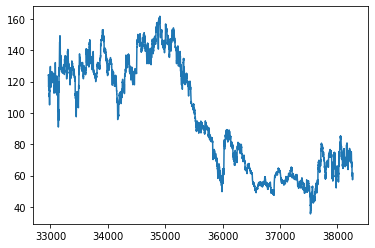

In [ ]:
ibm['adjusted_close'].plot()

In [ ]:
df['date'].min(), df['date'].max()

('1999-11-01', '2020-11-25')

In [ ]:
dates = pd.date_range(df['date'].min(), df['date'].max())
dates

DatetimeIndex(['1999-11-01', '1999-11-02', '1999-11-03', '1999-11-04',
               '1999-11-05', '1999-11-06', '1999-11-07', '1999-11-08',
               '1999-11-09', '1999-11-10',
               ...
               '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23',
               '2020-11-24', '2020-11-25'],
              dtype='datetime64[ns]', length=7696, freq='D')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38268 entries, 0 to 38267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               38268 non-null  object 
 1   open               38268 non-null  float64
 2   high               38268 non-null  float64
 3   low                38268 non-null  float64
 4   close              38268 non-null  float64
 5   adjusted_close     38268 non-null  float64
 6   volume             38268 non-null  int64  
 7   dividend_amount    38268 non-null  float64
 8   split_coefficient  38268 non-null  float64
 9   Name               38268 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 2.9+ MB


In [ ]:
close_prices = pd.DataFrame(index=dates)

In [ ]:
close_prices.head()

""
1999-11-01
1999-11-02
1999-11-03
1999-11-04
1999-11-05


In [ ]:
symbols = df['Name'].unique()

In [ ]:
symbols

array(['TSLA', 'INTC', 'AMD', 'AAPL', 'MSFT', 'SPY', 'GOOG', 'FB', 'IBM'],
      dtype=object)

In [ ]:

df2 = pd.DataFrame(data=ibm['adjusted_close'].to_numpy(), index=ibm['date'], \
                   columns=['IBM'])

In [ ]:
df2.head()

,IBM
date,
2020-11-25,124.20
2020-11-24,124.42
2020-11-23,120.09
2020-11-20,116.94
2020-11-19,117.18


In [ ]:
# Let's now fill in our close prices dataframe
for symbol in symbols:
  df_sym = df[df['Name'] == symbol]
  df_tmp = pd.DataFrame(data=df_sym['adjusted_close'].to_numpy(), \
                        index=df_sym['date'], columns=[symbol])
  close_prices = close_prices.join(df_tmp) # left-join by default

In [ ]:
close_prices.head()

,TSLA,INTC,AMD,AAPL,MSFT,SPY,GOOG,FB,IBM
1999-11-01,NaN,23.867721,10.155,0.597773,29.465857,91.599631,NaN,NaN,61.535122
1999-11-02,NaN,24.338795,10.280,0.618028,29.526467,90.945015,NaN,NaN,60.301239
1999-11-03,NaN,25.054826,10.655,0.627654,29.347828,91.557400,NaN,NaN,60.021389
1999-11-04,NaN,25.623469,10.315,0.643981,29.268079,92.254185,NaN,NaN,58.234168
1999-11-05,NaN,25.881086,10.625,0.680100,29.207469,93.162188,NaN,NaN,57.400979


In [ ]:
close_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7696 entries, 1999-11-01 to 2020-11-25
Freq: D
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    2623 non-null   float64
 1   INTC    5303 non-null   float64
 2   AMD     5303 non-null   float64
 3   AAPL    5303 non-null   float64
 4   MSFT    5303 non-null   float64
 5   SPY     5303 non-null   float64
 6   GOOG    1681 non-null   float64
 7   FB      2146 non-null   float64
 8   IBM     5303 non-null   float64
dtypes: float64(9)
memory usage: 921.2 KB


In [ ]:
close_prices.to_csv('sp500_close.csv')

In [ ]:
!head sp500_close.csv

,TSLA,INTC,AMD,AAPL,MSFT,SPY,GOOG,FB,IBM
2014-03-27,41.464,21.0184784826,3.91,17.2263897571,34.295099683400004,162.358036344,558.46,60.97,145.173820343
2014-03-28,42.474,21.2759153981,3.88,17.2071588676,35.1141391575,163.158479583,559.99,60.01,145.64796968
2014-03-31,41.69,21.4370210806,4.01,17.2033126897,35.7153489843,164.495483675,556.97,60.24,147.20807395
2014-04-01,43.394,21.583178813299998,4.07,17.3606854686,36.0900159778,165.58619753899998,567.16,62.62,148.74523551
2014-04-02,46.058,21.500134647,4.06,17.3895318028,36.0290236765,166.140350551,567.0,62.72,148.018716364
2014-04-03,45.08,21.931964311599998,4.0,17.2690182288,35.7327753561,165.92044856200002,569.74,59.49,147.361025349
2014-04-04,42.445,21.724353895900002,4.01,17.045619396099998,34.739472164,163.958922823,543.14,56.749,146.657448913
2014-04-07,41.504,21.9942474363,3.88,16.7779895176,34.6784798627,162.146930435,538.15,56.95,148.760530649
2014-04-08,43.092,22.3471851429,3.99,16.7770279732,34.6959062345,162.81543248100002,

In [ ]:
close2 = pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)
close2.head()

,TSLA,INTC,AMD,AAPL,MSFT,SPY,GOOG,FB,IBM
2014-03-27,41.464,21.018478,3.91,17.226390,34.295100,162.358036,558.46,60.97,145.173820
2014-03-28,42.474,21.275915,3.88,17.207159,35.114139,163.158480,559.99,60.01,145.647970
2014-03-31,41.690,21.437021,4.01,17.203313,35.715349,164.495484,556.97,60.24,147.208074
2014-04-01,43.394,21.583179,4.07,17.360685,36.090016,165.586198,567.16,62.62,148.745236
2014-04-02,46.058,21.500135,4.06,17.389532,36.029024,166.140351,567.00,62.72,148.018716


In [ ]:
close2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1681 entries, 2014-03-27 to 2020-11-25
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    1681 non-null   float64
 1   INTC    1681 non-null   float64
 2   AMD     1681 non-null   float64
 3   AAPL    1681 non-null   float64
 4   MSFT    1681 non-null   float64
 5   SPY     1681 non-null   float64
 6   GOOG    1681 non-null   float64
 7   FB      1681 non-null   float64
 8   IBM     1681 non-null   float64
dtypes: float64(9)
memory usage: 131.3 KB


In [ ]:
# drop rows with all nan
# most likely correspond to weekends, holidays (non-trading days)
close_prices.dropna(axis=0, how='all', inplace=True)

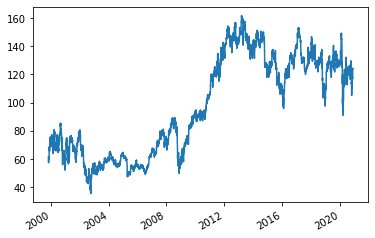

In [ ]:
close_prices['IBM'].plot()

In [ ]:
close_prices.isna().sum()

TSLA    2680
INTC       0
AMD        0
AAPL       0
MSFT       0
SPY        0
GOOG    3622
FB      3157
IBM        0
dtype: int64

In [ ]:
close_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5303 entries, 1999-11-01 to 2020-11-25
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    2623 non-null   float64
 1   INTC    5303 non-null   float64
 2   AMD     5303 non-null   float64
 3   AAPL    5303 non-null   float64
 4   MSFT    5303 non-null   float64
 5   SPY     5303 non-null   float64
 6   GOOG    1681 non-null   float64
 7   FB      2146 non-null   float64
 8   IBM     5303 non-null   float64
dtypes: float64(9)
memory usage: 414.3 KB


In [ ]:
close_prices=close_prices.iloc[-1681:]

In [ ]:
close_prices.head()

,TSLA,INTC,AMD,AAPL,MSFT,SPY,GOOG,FB,IBM
2014-03-27,41.464,21.018478,3.91,17.226390,34.295100,162.358036,558.46,60.97,145.173820
2014-03-28,42.474,21.275915,3.88,17.207159,35.114139,163.158480,559.99,60.01,145.647970
2014-03-31,41.690,21.437021,4.01,17.203313,35.715349,164.495484,556.97,60.24,147.208074
2014-04-01,43.394,21.583179,4.07,17.360685,36.090016,165.586198,567.16,62.62,148.745236
2014-04-02,46.058,21.500135,4.06,17.389532,36.029024,166.140351,567.00,62.72,148.018716


In [ ]:
close_prices.isna().sum().sum()

0

In [ ]:
close_prices.iloc[0, :].isna().sum()

0

In [ ]:
close_prices.fillna(method='ffill', inplace=True)

In [ ]:
close_prices.isna().sum().sum()

0

In [ ]:
close_prices.fillna(method='bfill', inplace=True)

In [ ]:
close_prices.isna().sum().sum()

0

In [ ]:

close_prices.to_csv('sp500_close.csv')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1136b3ab38>,
      dtype=object)

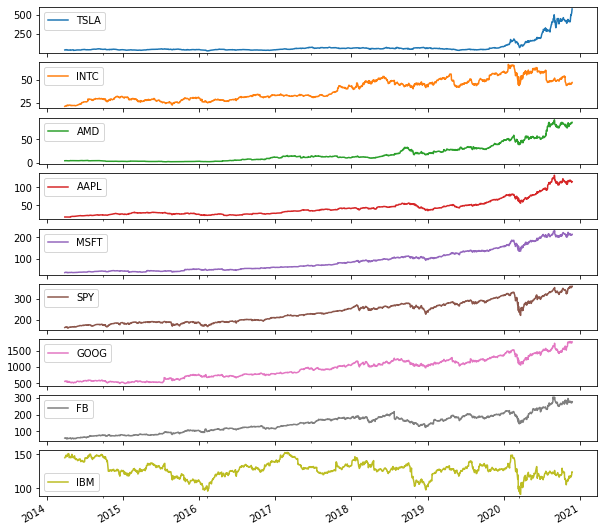

In [ ]:

close_prices.plot(subplots=True,figsize=(10,10))

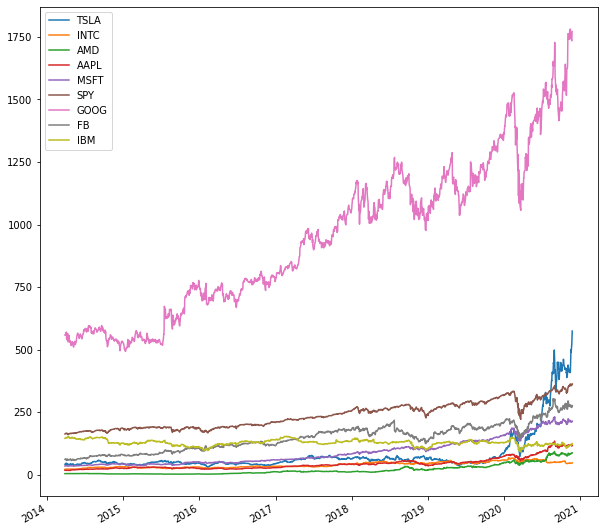

In [ ]:
close_prices.plot(legend=True, figsize=(10, 10));

now scale each time points by dividing them by first (time 0) element in the each series.

In [ ]:
close_prices_normalized = close_prices / close_prices.iloc[0]

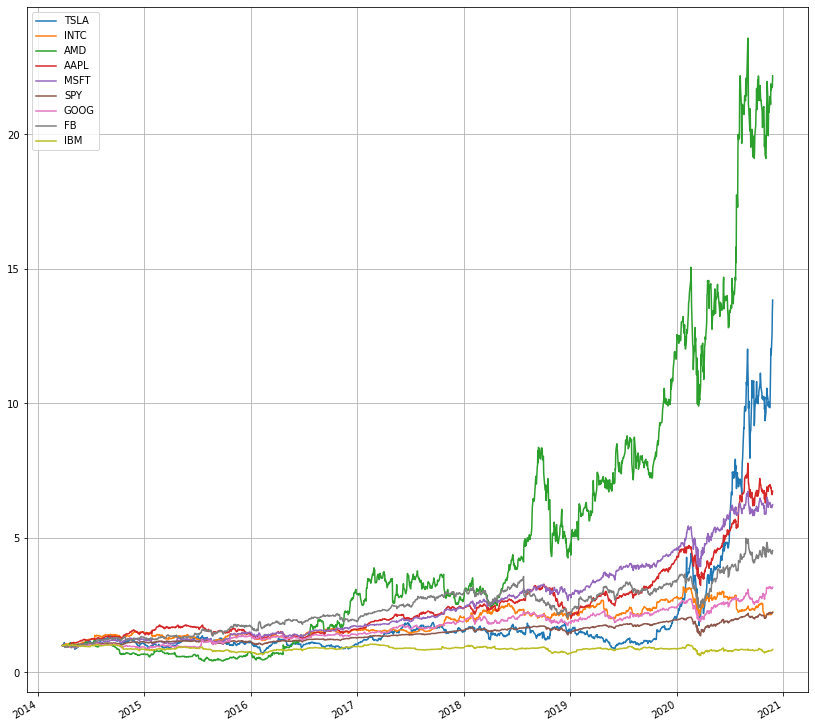

In [ ]:
close_prices_normalized.plot(legend=True, figsize=(14, 14),grid=True);